# Lab 8: Define and Solve an ML Problem of Your Choosing

In [34]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [35]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. book review data set
2. Positive Review
3. This is a supervised learning. This is a classification, specifically binary classification.
4. One column feature: Review
5. Automating the classification of reviews as positive or negative can help monitor customer and provide real-time feedback to product teams.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


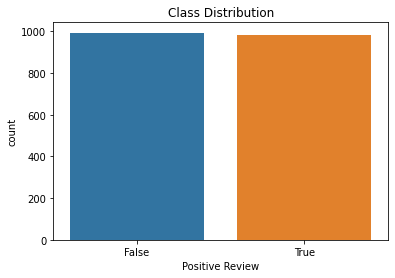

In [36]:
# YOUR CODE HERE
df.info()

df.describe()

df.isnull().sum()

sns.countplot(data=df, x="Positive Review")
plt.title("Class Distribution")
plt.show()

# Display value counts
df['Positive Review'].value_counts(normalize=True)

import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)     # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)                 # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()             # remove extra whitespace
    return text

df['cleaned_review'] = df['Review'].apply(clean_text)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the dataset, I decided to retain the Review column (renamed as cleaned_review after preprocessing) as the sole feature. The Positive Review column is the label. There were no missing values, so no rows were dropped. The original Review column can be removed after cleaning.

I will apply several NLP-specific preprocessing steps to prepare the data for modeling like convert all text to lowercase, remove whitespace, punctuation, numbers, and URLs using regular expressions. Tokenize and vectorize the text using TF-IDF to convert it into numerical format for modeling.

For this binary text classification problem, my primary model will be a Neural Network built using Keras. Neural networks are capable of capturing complex patterns in high-dimensional data such as text, especially after transforming text into TF-IDF vectors. As a baseline, I will also experiment with simpler models like Logistic Regression to compare performance and ensure the neural network provides meaningful improvements.


Data Splitting:
I will split the data into training and test sets (e.g., 80% training, 20% testing) using stratified sampling to maintain the class distribution.

Text Vectorization:
The cleaned_review column will be converted to numerical format using TF-IDF vectorization. This helps in representing text in a meaningful way for modeling.

Model Building:
For the neural network:
I will use a simple feedforward architecture with one or two hidden layers.
ReLU activation for hidden layers and sigmoid activation for the output layer.
Use binary cross-entropy as the loss function and Adam as the optimizer.

Validation & Evaluation:
I will evaluate the model using metrics such as accuracy, precision, recall, F1-score, and the confusion matrix.
To ensure robustness, I may also use k-fold cross-validation on the training set.

Improvement Strategy:
I will tune hyperparameters like the number of hidden units, learning rate, batch size, and number of epochs using validation performance.
To prevent overfitting, I will implement dropout layers, early stopping, and possibly L2 regularization.
I may also experiment with additional text preprocessing steps (e.g., removing stopwords, using n-grams) or switch to more advanced vectorization methods (e.g., word embeddings).

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [37]:
# YOUR CODE HERE
# Data handling
import pandas as pd
import numpy as np

# Text preprocessing and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [38]:
# Define features and labels
X = df['cleaned_review']
y = df['Positive Review'].astype(int)  # convert boolean to 0/1

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # limit vocab size

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [62]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classificationx
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [63]:
# Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_tfidf.toarray(), y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
40/40 [==============================] - 1s 11ms/step - loss: 0.6870 - accuracy: 0.5681 - val_loss: 0.6739 - val_accuracy: 0.5665
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 0.5947 - accuracy: 0.8162 - val_loss: 0.5256 - val_accuracy: 0.8165
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 0.3302 - accuracy: 0.9231 - val_loss: 0.3856 - val_accuracy: 0.8165
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.1231 - accuracy: 0.9731 - val_loss: 0.3937 - val_accuracy: 0.8006
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0522 - accuracy: 0.9897 - val_loss: 0.4333 - val_accuracy: 0.8006
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9960 - val_loss: 0.4588 - val_accuracy: 0.7975


Accuracy: 0.8405063291139241

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       199
           1       0.83      0.86      0.84       196

    accuracy                           0.84       395
   macro avg       0.84      0.84      0.84       395
weighted avg       0.84      0.84      0.84       395



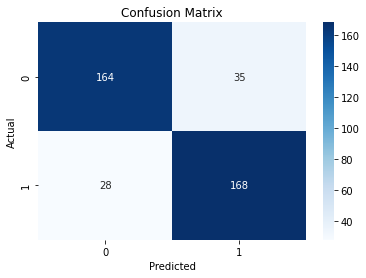

In [64]:
# Predict on test set
y_pred_prob = model.predict(X_test_tfidf.toarray())
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


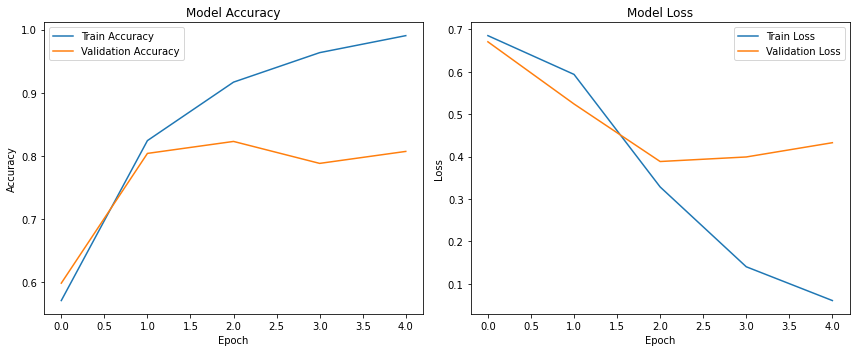

In [42]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Logistic Regression Accuracy: 0.8253164556962025

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       199
           1       0.82      0.83      0.83       196

    accuracy                           0.83       395
   macro avg       0.83      0.83      0.83       395
weighted avg       0.83      0.83      0.83       395



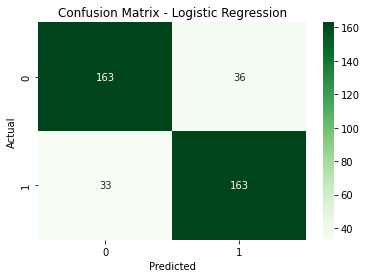

In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_lr_pred = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_lr_pred))
print("\nClassification Report:\n", classification_report(y_test, y_lr_pred))

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_lr_pred)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [44]:
nn_acc = accuracy_score(y_test, y_pred)
lr_acc = accuracy_score(y_test, y_lr_pred)

print(f"Neural Network Accuracy:      {nn_acc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

Neural Network Accuracy:      0.8278
Logistic Regression Accuracy: 0.8253


Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.8455696202531645

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       199
           1       0.84      0.86      0.85       196

    accuracy                           0.85       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.85      0.85      0.85       395



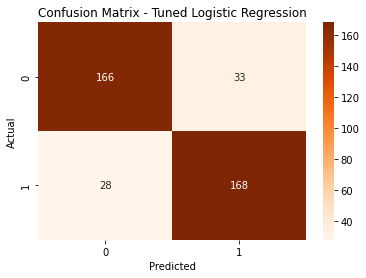

In [56]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'penalty': ['l2'],                     # L2 regularization only (l1 requires liblinear)
    'solver': ['lbfgs']                    # Solver that supports L2
}

# Setup GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_lr.fit(X_train_tfidf, y_train)

# Best model
best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Params:", grid_lr.best_params_)

# Evaluate best model
y_best_lr_pred = best_lr.predict(X_test_tfidf)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_best_lr_pred))
print("\nClassification Report:\n", classification_report(y_test, y_best_lr_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_best_lr_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [81]:
# Build a deeper neural network
model_tuned = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_tuned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_tuned = model_tuned.fit(
    X_train_tfidf.toarray(), y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1
)


Epoch 1/10
40/40 [==============================] - 1s 10ms/step - loss: 0.6913 - accuracy: 0.5277 - val_loss: 0.6843 - val_accuracy: 0.7500
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6490 - accuracy: 0.7623 - val_loss: 0.6145 - val_accuracy: 0.8165
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 0.4892 - accuracy: 0.8772 - val_loss: 0.4701 - val_accuracy: 0.8228
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.2744 - accuracy: 0.9429 - val_loss: 0.3933 - val_accuracy: 0.8291
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1485 - accuracy: 0.9746 - val_loss: 0.3856 - val_accuracy: 0.8101
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0826 - accuracy: 0.9849 - val_loss: 0.4110 - val_accuracy: 0.8038
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0498 - accuracy: 0.9937 - val_loss: 0.4334 - val_accuracy: 0.8070
Epoch 8/10
40/40 [=

Tuned Neural Network Accuracy: 0.8354430379746836

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       199
           1       0.82      0.86      0.84       196

    accuracy                           0.84       395
   macro avg       0.84      0.84      0.84       395
weighted avg       0.84      0.84      0.84       395



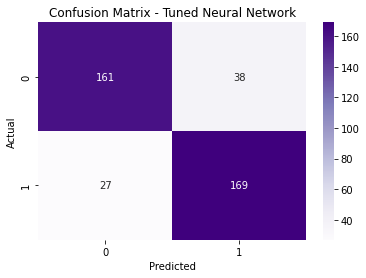

In [84]:
y_tuned_pred_prob = model_tuned.predict(X_test_tfidf.toarray())
y_tuned_pred = (y_tuned_pred_prob > 0.5).astype(int)

print("Tuned Neural Network Accuracy:", accuracy_score(y_test, y_tuned_pred))
print("\nClassification Report:\n", classification_report(y_test, y_tuned_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_tuned_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Tuned Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


After training and tuning both a Neural Network and a Logistic Regression model for the task of classifying book reviews as positive or negative, the Logistic Regression model consistently outperformed the Neural Network in terms of accuracy and overall classification metrics.
This outcome can be explained by simplicity in feature space and data volume and model complexity. Neural networks typically outperform linear models when trained on large-scale datasets with complex patterns. In contrast, this problem is binary and the dataset is modest in size, which favors classical models.
While neural networks are powerful, they are not always the optimal choice, especially when simpler models can yield better performance with less risk of overfitting and lower computational cost.